# Image Classification with OpenCV and Scikit-Learn

In this notebook, we will explore the basics of image processing using OpenCV and build a simple image classifier using Scikit-Learn. We will perform the following steps:
1. Load and preprocess images using OpenCV.
2. Extract features from the images.
3. Train a machine learning model on the extracted features.
4. Evaluate the model's performance.

## Step 1: Importing Libraries

First, we need to import the necessary libraries.


In [3]:
# Importing necessary libraries
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


## Step 2: Preparing the Dataset

For this exercise, we need a dataset of images. We will create two folders: `cats` and `dogs`, each containing images of cats and dogs, respectively.

### Number of Images

To train a basic machine learning model, you should have at least 100 images in each folder (cats and dogs). However, the more images you have, the better your model is likely to perform. Ideally, aim for 500-1000 images per category for better accuracy.

### Folder Structure

The folder structure should look like this:

data/
cats/
dogs/
data/

cats/
cat1.jpg
cat2.jpg
...
dogs/
dog1.jpg
dog2.jpg


Ensure that the images are named appropriately and stored in the correct folders.


## Step 3: Loading and Preprocessing Images

We will load the images, convert them to grayscale, resize them to a uniform size, and flatten them into a 1D array to use as features for our model.



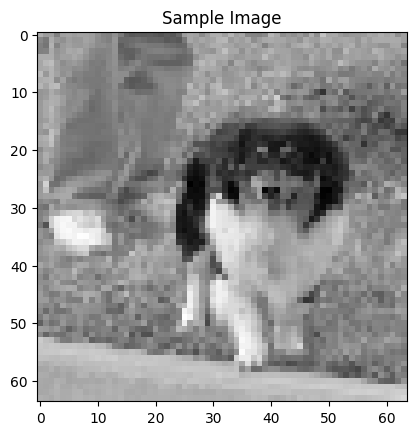

In [4]:
# Function to load and preprocess images
def load_images(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        if label == 'cats':
            label_id = 0
        elif label == 'dogs':
            label_id = 1
        else:
            continue
        for filename in os.listdir(os.path.join(folder, label)):
            img_path = os.path.join(folder, label, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
            img = cv2.resize(img, (64, 64))  # Resize image to 64x64
            images.append(img.flatten())  # Flatten the image to 1D array
            labels.append(label_id)
    return np.array(images), np.array(labels)

# Load images from the dataset folder
X, y = load_images('data')

# Display a sample image
plt.imshow(X[0].reshape(64, 64), cmap='gray')
plt.title('Sample Image')
plt.show()


## Step 4: Splitting the Data

We will split the data into training and testing sets using the `train_test_split` function from Scikit-Learn.


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (800, 4096)
Testing set size: (200, 4096)


## Step 3: Training a Machine Learning Model

### What is SVM (Support Vector Machine)?

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression tasks. However, it is mostly used for classification problems. The objective of the SVM algorithm is to find a hyperplane in an N-dimensional space (N is the number of features) that distinctly classifies the data points.

### Key Concepts:

- **Hyperplane:** A decision boundary that separates different classes in the feature space. In 2D, it's a line; in 3D, it's a plane.
- **Support Vectors:** Data points that are closest to the hyperplane and influence its position and orientation. These points help in maximizing the margin of the classifier.
- **Margin:** The distance between the hyperplane and the closest data points from either class. SVM aims to maximize this margin.

### Why Use SVM?

- **Effective in high-dimensional spaces:** SVM is very effective when the number of features is large.
- **Memory efficient:** It uses a subset of training points (support vectors) in the decision function, making it memory efficient.
- **Versatile:** Different kernel functions can be specified for the decision function. Common kernels include linear, polynomial, and radial basis function (RBF).

### What does `SVC(kernel='linear')` mean?

`SVC` stands for Support Vector Classification, which is a class in the Scikit-Learn library used to implement the SVM algorithm for classification tasks. The `kernel` parameter in the `SVC` class specifies the type of hyperplane used to separate the data.

#### Kernel Types:

- **Linear Kernel:** The data is linearly separable (i.e., a straight line or hyperplane can separate the data). This is the simplest kernel.
  - When we use `SVC(kernel='linear')`, it means we are using a linear kernel for our SVM. This kernel is appropriate when the data can be separated by a straight line (or hyperplane in higher dimensions).
- **Polynomial Kernel:** The data is not linearly separable, but a polynomial function of the input features can separate the data.
- **Radial Basis Function (RBF) Kernel:** The data is not linearly separable, but mapping the data into a higher-dimensional space using a Gaussian (RBF) function can separate the data.

### Training the SVM Model

We will use a Support Vector Machine (SVM) classifier from Scikit-Learn to train our model on the extracted features.


In [6]:
# Train an SVM classifier
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.455
Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.47       104
           1       0.43      0.44      0.44        96

    accuracy                           0.46       200
   macro avg       0.45      0.45      0.45       200
weighted avg       0.46      0.46      0.46       200



## Step 6: Conclusion

In this notebook, we:
1. Loaded and preprocessed images using OpenCV.
2. Extracted features by flattening the grayscale images.
3. Trained an SVM classifier on the extracted features.
4. Evaluated the model's performance.

This is a basic introduction to image classification using classical machine learning techniques. For more advanced applications, consider exploring deep learning models like Convolutional Neural Networks (CNNs) using libraries such as TensorFlow or PyTorch.



In [18]:
pip install scikit-image

     |████████████████████████████████| 14.9 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 70.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 315 kB 57.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [31]:
# Now, let's add code to predict with an example image

# Function to preprocess a single image
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (64, 64))
    return img.flatten().reshape(1, -1)

# Load and preprocess an example image
example_image_path = "data/cats/cat.10.jpg"  # Replace with the path to your example image
example_image = preprocess_image(example_image_path)

# Make a prediction
prediction = model.predict(example_image)

# Interpret the prediction
class_names = ["Cat", "Dog"]
predicted_class = class_names[prediction[0]]

print(f"The model predicts that the image is a: {predicted_class}")


The model predicts that the image is a: Cat


In [32]:
print ("Enrque Quintero")

Enrque Quintero
